In [1]:
import numpy as np
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/fixed_density/"
from matplotlib import colormaps
cm = colormaps['viridis']
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
media2 = "/media/hcleroy/Simulation_Res/Cluster/N50"
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"

In [2]:
density = 'mu5e_2_'
Names = ['N5','N10','N25','N50','N100','N100']
N = [5,10,25,50,100,100]
L = [100,200,500,1000,2000,2000]
#NAMEs = ['N50','mu5e_2','mu5e_2_b']
#N = [50,50,50]
#L = [1000,1000,1000]

In [3]:
Entropies = list()
NRGs = list()
for name in Names:
    print(name)
    Entropies.append(Data_Treatement(media+density+name+'.hdf',data_type='Entropy'))
    NRGs.append(Data_Treatement(media+density+name+'.hdf',data_type='NRG'))

media_3 = "/media/hcleroy/Simulation_Res/Cluster/N/100/mu5e_2/"
file_3 = "E-15_N100_ell2E3_kdiffE-3.hdf"
Entropies.append(Data_Treatement(media_3+file_3,data_type='Entropy'))
NRGs.append(Data_Treatement(media_3+file_3,data_type='NRG'))
for entropy,nrg  in zip(Entropies,NRGs):
    entropy.average(num_bins=100,log_scale=True,min_bin_val=10**-2)
    nrg.average(num_bins=100,log_scale=True,min_bin_val=10**-2)

N5
N10
N25
N50
N100
N100


/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation/Data_Treatement.py:284: RuntimeWarning: invalid value encountered in divide
  weighted_average /=count


In [4]:
time_shift =Data_Treatement(media_3+file_3,data_type='Time_shift')
time_shift = np.mean(time_shift.data,axis=0)

In [5]:
Finitial = lambda N,L,E: E*N - 1.5*((N-1)*np.log((3*(N+1))/(2*np.pi*L))) - (N-1)
Finitial = lambda N,L,E: E*N - 1.5*(N-1)*(np.log((3*(N+1))/(np.pi*L))  - 1)
#Finitial = lambda N,L,E: E*N - 1.5*((N-1)*np.log((3*(N))/(2*np.pi*L))  - (N-1)/(2*(N)))-np.log(4*np.pi)
Finitial = lambda N,L,E:E*N-1.5*(N-1)*(np.log(3*(N+1)/(2*np.pi*L))-2.7**2*(N+1)/L)
Finitial = lambda N,L,E: E*N - 1.5*((N-1)*np.log((3*(N+1))/(2*np.pi*L))  - (N+1)/(2*(N-1)))#-2*np.log(4*np.pi)
Sfree = lambda L : L*np.log(4*np.pi)
Ffree = lambda L,N,E :E*N -  L*np.log(4*np.pi)

In [6]:
time_shift

array([0.0, 42.64286966841622, 89.01526863840375, 182.427843592196,
       371.05076967348083, 750.8431073052468, 1511.8981528435368,
       3026.99447631168, 6017.146743911477, 11878.023867514607],
      dtype=object)

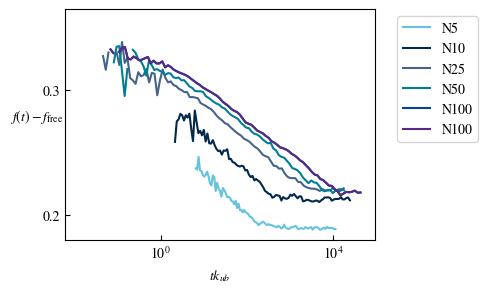

In [7]:
CNRSColors = [(98./255.,196./255.,221./255.), (0/255.,41./255.,75./255.), (69./255.,100./255.,135./255.), (0./255.,126./255.,148./255.), (0./255.,68./255.,148./255.),(86./255.,42./255.,132./255.)]
MARKERS = ['o','v','D','P','*','h']
fig,ax = plt.subplots(ncols=1,figsize=(4,3))
n=0
for Entropy,NRG in zip(Entropies[:-1],NRGs[:-1]):#[i:i+1]):
    X,Y = NRG.binned_time[1:],NRG.average_data[1:]-Entropy.average_data[1:]
    ax.plot(X,(Y-Ffree(L[n],N[n],-15))/L[n],label=Names[n],color=CNRSColors[n])
    n+=1

#ax.set_yticks([0.,1.])
ax.set_xscale('log')
ax.set_xticks([10**0,10**4])
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.set_yticks([0.2,0.3])
#NAMEs = ['N50','mu5e_2','mu5e_2_b']
#N = [50,50,50]
#L = [1000,1000,1000]
ax.set_ylabel(r"$f(t) - f_\text{free}$",rotation=0)
ax.set_xlabel(r'$tk_{ub}$')
#ax.set_ylim(-3.1,-2.9)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
#ax.scatter(time_shift,[0 for _ in range(time_shift.shape[0])])
#plt.savefig('FreeEnergy.svg',transparent=True,bbox_inches='tight')

In [8]:
for nrg in NRGs:
    print(nrg.attributes)

{'ell_tot': 100, 'Energy': -15, 'kdiff': 0.001, 'seed': 583684, 'Nlinker': 5, 'dimension': 3, 'step_tot': 100000, 'check_steps': 10000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (100, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args': {'NRG': True, 'Cluster': True, 'MSD': False, 'ISF': True, 'PCF': True, 'PCF_L': False}, 'ISF_arg': 2.0}
{'ell_tot': 200, 'Energy': -15, 'kdiff': 0.001, 'seed': 29701, 'Nlinker': 10, 'dimension': 3, 'step_tot': 500000, 'check_steps': 10000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (200, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args': {'NRG': True

# Check with a different kdiff

In [9]:
media_1 = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/fixed_density/"
file_1 = 'mu5e_2_N100.hdf'

media_2 = "/media/hcleroy/Simulation_Res/Cluster/N/100/mu5e_2/"
file_2 = "E-15_N100_ell2E3_kdiffE-4.hdf"

media_3 = "/media/hcleroy/Simulation_Res/Cluster/N/100/mu1e_2/"
file_3 = "E-15_N100_ellE4_kdiffE-3.hdf"

Entropies = list()
NRGs = list()

Entropies.append(Data_Treatement(media_1+file_1,data_type='Entropy'))
Entropies.append(Data_Treatement(media_2+file_2,data_type='Entropy'))
Entropies.append(Data_Treatement(media_3+file_3,data_type='Entropy'))
NRGs.append(Data_Treatement(media_1+file_1,data_type='NRG'))
NRGs.append(Data_Treatement(media_2+file_2,data_type='NRG'))
NRGs.append(Data_Treatement(media_3+file_3,data_type='NRG'))


In [10]:
for ent,nrg  in zip(Entropies,NRGs):
    ent.average(num_bins=100,log_scale=True)
    nrg.average(num_bins=100,log_scale=True)
    print(ent.attributes)

{'ell_tot': 2000, 'Energy': -15, 'kdiff': 0.001, 'seed': 729473, 'Nlinker': 100, 'dimension': 3, 'step_tot': 10000000, 'check_steps': 10000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (2.67,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (2000, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args': {'NRG': True, 'Cluster': True, 'MSD': False, 'ISF': True, 'PCF': True, 'PCF_L': False}, 'ISF_arg': 2.0}
{'ell_tot': 2000, 'Energy': -15, 'kdiff': 0.0001, 'seed': 390340, 'Nlinker': 100, 'dimension': 3, 'step_tot': 100000000, 'check_steps': 10000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (2.67,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (2000, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args'

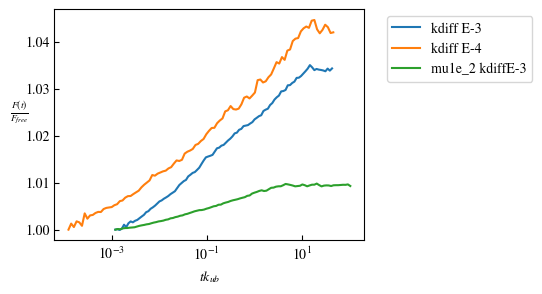

In [19]:
Names = ['kdiff E-3', 'kdiff E-4','mu1e_2 kdiffE-3']
N = [100,100,100]
L = [2000,2000,10**4]
KDIFF = [10**-3,10**-4,10**-3]
fig,ax = plt.subplots(ncols=1,figsize=(4,3))
n=0
for Entropy,NRG in zip(Entropies[:],NRGs[:]):#[i:i+1]):
    X,Y = NRG.binned_time[1:],NRG.average_data[1:]-Entropy.average_data[1:]
    #ax.plot(X*KDIFF[n],(Y-Ffree(L[n],N[n],-15))/L[n],label=Names[n])
    ax.plot(X*KDIFF[n],Y/Y[0],label=Names[n])
    n+=1

#ax.set_yticks([0.,1.])
ax.set_xscale('log')
#ax.set_xticks([10**0,10**4])
ax.xaxis.set_minor_locator(plt.NullLocator())
#NAMEs = ['N50','mu5e_2','mu5e_2_b']
#N = [50,50,50]
#L = [1000,1000,1000]
ax.set_ylabel(r"$\frac{F(t)}{F_{free}}$",rotation=0)
ax.set_xlabel(r'$tk_{ub}$')
#ax.set_ylim(-3.1,-2.9)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
#ax.scatter(time_shift,[0 for _ in range(time_shift.shape[0])])
#plt.savefig('FreeEnergy.svg',transparent=True,bbox_inches='tight')